In [1]:
import matplotlib.pyplot as plt
import os


from numpy import arange, array, cumsum
from pandas import read_csv, DataFrame
from numpy import zeros, median
from obspy import UTCDateTime
from numpy import isnan
from obspy import UTCDateTime

In [2]:

year = '2021'
cha  = 'BJW'
mode = 'runz'

path = f'/home/andbro/Documents/ROMY/QualityCheck/{mode}/logs/'
path2plots = f'/home/andbro/Documents/ROMY/QualityCheck/{mode}/'

ifile = f'{year}_{cha}_overview'

sgnc_freq = {'Z': 551.68, 'U': 302.96, 'V': 448.09,'W': 448.09}

In [3]:
## read data
data = read_csv(path+ifile, delimiter=",")

## sort data frame in case any mixup occured
data = data.sort_values(by=['doy'], ascending=True, axis=0)

## check for doubles 
doubles = 0
if data.doy.duplicated().any():
    doubles +=1
print(f"\n {doubles} doubles found")


## select February and March
data = data[(data.doy > 31) & (data.doy < 81)]
x1, x2 = 31.5, 81.5



 0 doubles found


In [4]:
max_samples_per_day = max(data.total_samples)

In [5]:
q0p = data.Q0/max_samples_per_day*100
q1p = data.Q1/max_samples_per_day*100
q2p = data.Q2/max_samples_per_day*100

In [6]:
gaps = []
for i in range(1, 91):
    if i not in list(data.doy):
        gaps.append(i)
print(f"there are: {len(gaps)} gaps")

there are: 41 gaps


In [7]:

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']
months = [0, 31, 28, 31, 30, 31, 30, 31, 31, 30 ,31, 30]
m_cum = cumsum(months)+1


# Check with Log File

In [8]:
log_no_data = f"{path}{year}-{cha}.log"

if os.path.isfile(f"{path}{year}-{cha}.log"):
    
    no_data = read_csv(log_no_data, header=0, names =["Date", "Channel", "Comment"])

    doy = []
    for i in no_data.Date.to_list():
        doy.append(UTCDateTime(i).julday)

    no_data["doy"] = doy    
    
else:
    print("no log file found !")
    no_data = DataFrame()
    no_data["doy"] = []

no log file found !


# Plot Quality Overview

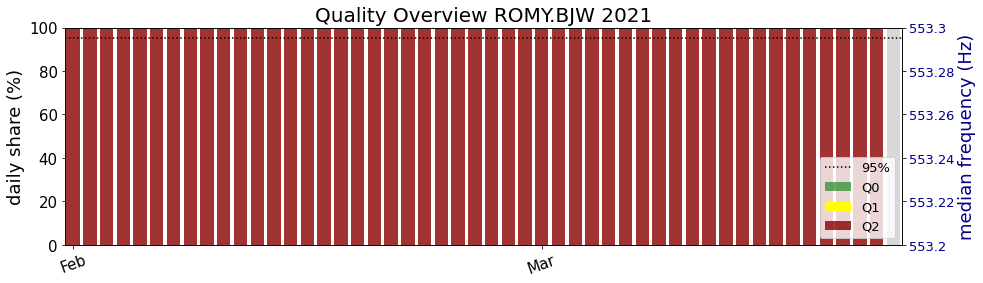

In [9]:

fig, ax = plt.subplots(1, 1, figsize=(15,4))

font=16

width=0.8
ax.bar(data.doy, q0p, width, color="forestgreen", alpha=0.7, label="Q0", edgecolor=None, aa=True)
ax.bar(data.doy, q1p, width,bottom=q0p, color="yellow", label="Q1", edgecolor=None, aa=True)
ax.bar(data.doy, q2p, width,bottom=q0p+q1p, color="darkred", alpha=0.8, label="Q2", edgecolor=None, aa=True)

# ax.plot(data.doy, data.bad_areas/data.Q2*100, zorder=1, color='black', ls='--', lw=0.8)


for gap in gaps:
    ax.bar(gap, 100, width=width, color="grey", alpha=0.3, zorder=2, aa=True)

# for no in no_data.doy:
#     ax.bar(no, 100, width=width, color="black", alpha=0.3, zorder=2, aa=True)

ax.set_ylim(0,100)
ax.set_xticks(m_cum)
ax.set_xticklabels(month_names, rotation=20)


ax.axhline(95, color='black', ls=':', label="95%")

ax.set_ylabel("daily share (%)", fontsize=font+2)

ax.tick_params(axis='both', labelsize=font-1)

ax.set_title(f"Quality Overview ROMY.{cha} {year}", fontsize=font+4)

ax.legend(fontsize=font-3, loc="lower right")

ax.set_xlim(x1,x2)



ax2 = ax.twinx()

col2 = "darkblue"

ax2.scatter(data.doy, data.frequency_med, color=col2, s=15, label=r"f$_{median}$")
ax2.plot(data.doy, data.frequency_med, color=col2, ls='--')

ax2.tick_params(axis='both', labelsize=font-3, labelcolor=col2)
ax2.set_ylabel("median frequency (Hz)", fontsize=font+2, color=col2)

ax2.set_ylim(553.2, 553.3)

ax2.set_yticks(arange(553.2, 553.3+0.02, 0.02))
ax2.set_yticklabels(arange(553.2, 553.3+0.02, 0.02))


plt.show();

fig.savefig(path2plots+"figs/"+f"{year}_{cha}_statistics_overview_zoomin.png", format="png", dpi=300)